In [ ]:
This Jupyter Notebook demonstrates the implementation of a multinomial logistic regression classifier using gradient descent. The notebook covers the following key steps:

1. **Data Preparation**:
    - Import necessary libraries (`numpy`, `matplotlib.pyplot`).
    - Generate synthetic data using multivariate normal distributions for different classes.
    - Combine the data into a single dataset and create one-hot encoded labels.

2. **Model Initialization**:
    - Define hyperparameters such as learning rate and number of iterations.
    - Initialize the model parameters (theta) to zeros.

3. **Softmax Function**:
    - Implement the softmax function to convert raw scores (logits) into probabilities.

4. **Training the Model**:
    - Perform gradient descent to optimize the model parameters.
    - Calculate the gradient of the loss function with respect to the parameters and update the parameters iteratively.

5. **Prediction Function**:
    - Define a function to make predictions using the trained model.

6. **Evaluation**:
    - Calculate the classification accuracy of the model on the training data.

7. **Visualization**:
    - Plot the data points.
    - Define and plot the decision boundary of the classifier.

The notebook concludes by visualizing the decision boundary of the trained logistic regression model along with the data points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
means = [[2, 2], [-2, 2], [2, -2], [-2, -2]]
cov = [[0.1, 0], [0, 0.1]]

In [3]:
classes = [np.random.multivariate_normal(mean, cov, 100) for mean in means]
X = np.vstack(classes)
y = np.repeat(np.arange(len(means)), 100)

In [4]:
y_onehot = np.eye(len(means))[y]
X_tr = np.hstack([np.ones((X.shape[0], 1)), X])

In [5]:
learning_rate = 0.1
iterations = 1000
theta = np.zeros((X_tr.shape[1], y_onehot.shape[1]))

In [6]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [7]:
for _ in range(iterations):
    z = np.dot(X_tr, theta)
    h = softmax(z)
    gradient = np.dot(X_tr.T, (h - y_onehot)) / y_onehot.shape[0]
    theta -= learning_rate * gradient

In [8]:
def predict(X, theta):
    z = np.dot(X, theta)
    h = softmax(z)
    return np.argmax(h, axis=1)

In [9]:
y_pred = predict(X_tr, theta)
accuracy = np.mean(y_pred == y)
print(f'Classification accuracy: {accuracy * 100:.2f}%')

Classification accuracy: 100.00%


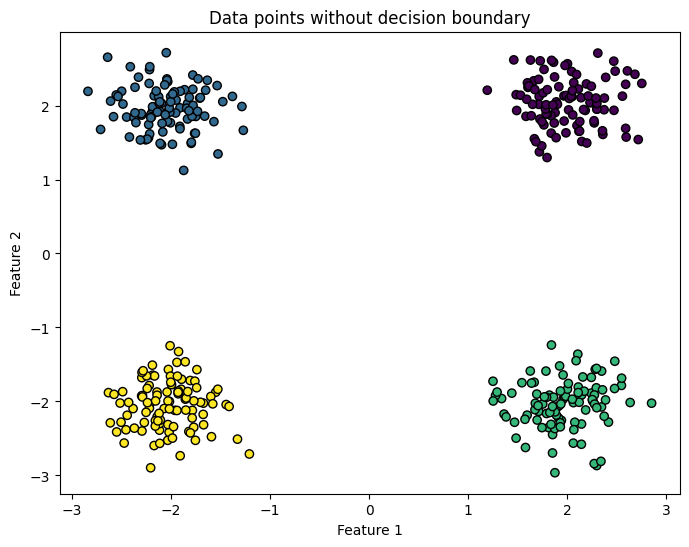

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('Data points without decision boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [11]:
def plot_decision_boundary(theta, X, y):
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    X_grid = np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()]
    Z = predict(X_grid, theta)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 1], X[:, 2], c=y, edgecolors='k', marker='o')
    plt.show()

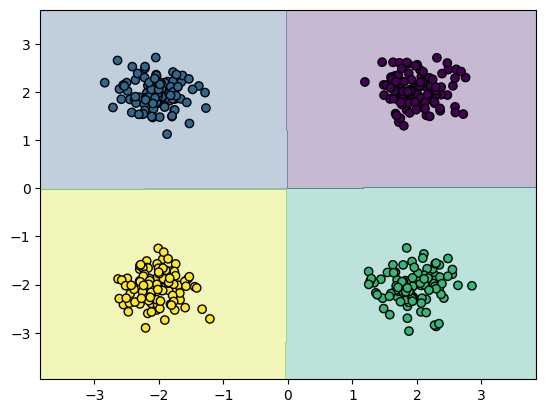

In [12]:
plot_decision_boundary(theta, X_tr, y)